# Installations

In [2]:
%pip install opencv-contrib-python
%pip install matplotlib
%pip install scikit-image
%pip install seaborn
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install streamlit


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install ipywidgets --upgrade
!jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension install --py widgetsnbextension

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook run server troubleshoot trust

Jupyter command `jupyter-nbex

# Imports

In [5]:
import kagglehub
import os

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import hog

from sklearn.cluster import KMeans


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

import joblib

from collections import Counter
import random



# Importing the Images

In [6]:
shawon10_ckplus_path = kagglehub.dataset_download('shawon10/ckplus')

print('Data source import complete.')
print('Data source path:', shawon10_ckplus_path)


Data source import complete.
Data source path: C:\Users\aliia\.cache\kagglehub\datasets\shawon10\ckplus\versions\1


In [7]:
count = 0
dataset_path = r'C:\Users\aliia\.cache\kagglehub\datasets\shawon10\ckplus\versions\1'
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        count += 1
        print(count)

C:\Users\aliia\.cache\kagglehub\datasets\shawon10\ckplus\versions\1\ck\CK+48\anger\S010_004_00000017.png
1
C:\Users\aliia\.cache\kagglehub\datasets\shawon10\ckplus\versions\1\ck\CK+48\anger\S010_004_00000018.png
2
C:\Users\aliia\.cache\kagglehub\datasets\shawon10\ckplus\versions\1\ck\CK+48\anger\S010_004_00000019.png
3
C:\Users\aliia\.cache\kagglehub\datasets\shawon10\ckplus\versions\1\ck\CK+48\anger\S011_004_00000019.png
4
C:\Users\aliia\.cache\kagglehub\datasets\shawon10\ckplus\versions\1\ck\CK+48\anger\S011_004_00000020.png
5
C:\Users\aliia\.cache\kagglehub\datasets\shawon10\ckplus\versions\1\ck\CK+48\anger\S011_004_00000021.png
6
C:\Users\aliia\.cache\kagglehub\datasets\shawon10\ckplus\versions\1\ck\CK+48\anger\S014_003_00000028.png
7
C:\Users\aliia\.cache\kagglehub\datasets\shawon10\ckplus\versions\1\ck\CK+48\anger\S014_003_00000029.png
8
C:\Users\aliia\.cache\kagglehub\datasets\shawon10\ckplus\versions\1\ck\CK+48\anger\S014_003_00000030.png
9
C:\Users\aliia\.cache\kagglehub\datas

# Preprocessing the Images

1. Convert images to grayscale.
2. Resize all images to a fixed size (e.g., 128x128).
3. Normalize pixel values.
4. Optionally apply histogram equalization.

In [8]:
# Initialize lists for processed images and labels
processed_images = []
labels = []

def preprocess_images():
    for dirname, _, filenames in os.walk(dataset_path):
        for filename in filenames:
            img_path = os.path.join(dirname, filename)
            img = cv2.imread(img_path)
            if img is not None:
                # Convert to grayscale
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                # Resize to 96x96
                resized = cv2.resize(gray, (96, 96))
                # Histogram equalization
                equalized = cv2.equalizeHist(resized)
                # Pixel Value Normalization
                normalized = equalized / 255.0
                # Append processed image and label
                processed_images.append(normalized)
                # Use the parent folder name as the label (because of file path structure)
                label = os.path.basename(os.path.dirname(img_path))
                labels.append(label)

preprocess_images()

# Convert to NumPy arrayse 
X = np.array(processed_images)
y = np.array(labels)

print(f"Processed images shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Processed images shape: (1962, 96, 96)
Labels shape: (1962,)


### Label Encoding the Target Variable (Emotions) 

In [9]:
# Label Encoding for the emotion targets
le = LabelEncoder()
y_encoded = le.fit_transform(y) 

# Analyzing the Class (Emotion) Distribution of the Images 

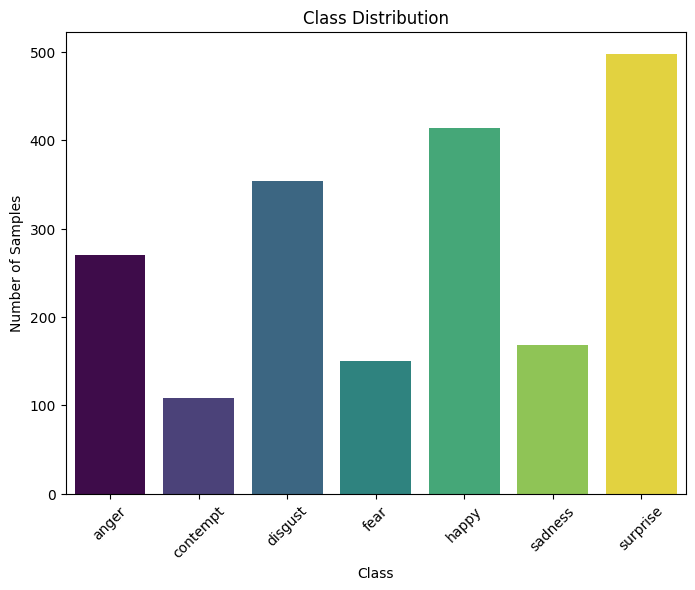

In [10]:
# Calculate class distribution
class_counts = Counter(y_encoded)

# Convert to lists for plotting
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=classes, y=counts, palette="viridis", hue=classes, dodge=False, legend=False)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(ticks=range(len(le.classes_)), labels=le.classes_, rotation=45)
plt.show()

# Functions For Model Evaluation 

In [11]:
def model_evaluation(y_test, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    print("Classification Report:\n", report)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


In [12]:
def visualize_predictions_with_original_images(X_original, test_indices, y_test, y_pred, le, num_samples=5):
    # Selecting random indices from the test set
    indices = random.sample(range(len(test_indices)), num_samples)
    
    plt.figure(figsize=(15, 10))
    for i, index in enumerate(indices):
        # Map the test index back to the original dataset
        original_index = test_indices[index]
        
        # Get the original image and its actual label
        original_image = X_original[original_index]
        actual_label = le.inverse_transform([y_test[index]])[0]
        
        # Retrieve the predicted label from y_pred
        predicted_label = le.inverse_transform([y_pred[index]])[0]
        
        # Plot the image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(original_image, cmap='gray')
        plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Comparing models that use HOG vs SIFT for feature extraction

# 1) HOG

## Feature Extraction

In [13]:
hog_features = []
hog_feature_maps = []

def extract_hog_features(images):
    for img in images:
        # Extract HOG features
        features, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True)
        hog_features.append(features)
        hog_feature_maps.append(hog_image)

extract_hog_features(X)

# Convert to NumPy array for model training
X_features = np.array(hog_features)
print(f"HOG features shape: {X_features.shape}")

HOG features shape: (1962, 4356)


### Feature Map Examples

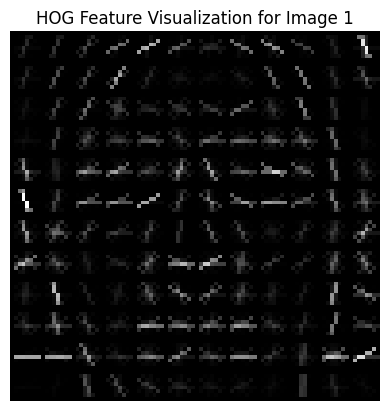

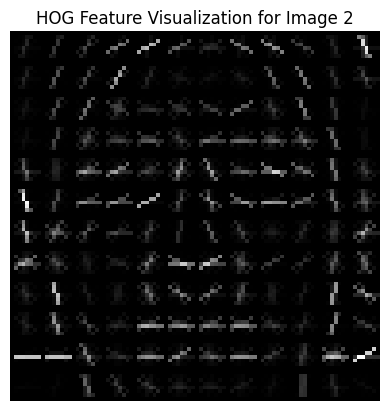

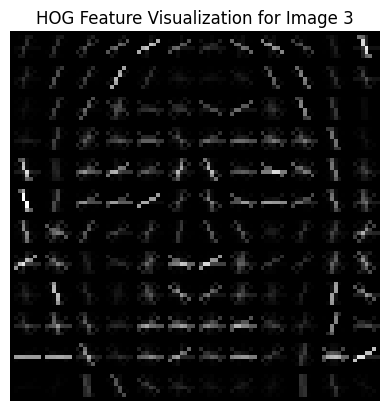

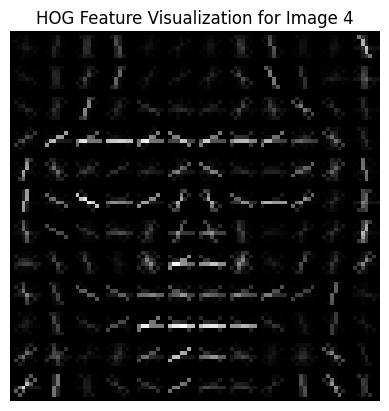

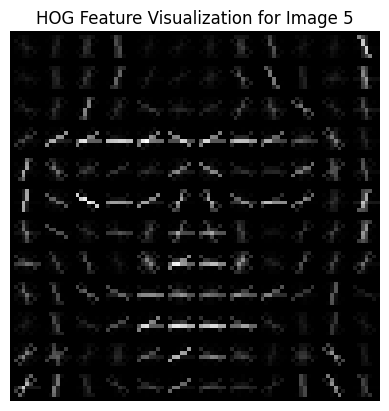

In [14]:
def display_feature_maps(feature_maps, img_number):
    plt.imshow(feature_maps[img_number], cmap='gray')
    plt.title("HOG Feature Visualization for Image " + str(img_number + 1))
    plt.axis('off')
    plt.show()


for i in range(5):
    display_feature_maps(hog_feature_maps, i)


## Train - Test Split

In [15]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X_features, y_encoded, np.arange(len(X)), test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1569, 4356)
Testing set size: (393, 4356)


## Model Training

### SVM

In [16]:
# Initialize the SVM classifier
svm_model = SVC(kernel='linear', class_weight= 'balanced', random_state=42)

# Train the model on the training set
svm_model.fit(X_train, y_train)

print("SVM model training complete.")

SVM model training complete.


### Random Forest

In [17]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)
print("Random Forest model training complete.")

Random Forest model training complete.


### Logistic Regression

In [18]:
# Initialize the Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train the model on the training set
lr_model.fit(X_train, y_train)
print("Logistic Regression model training complete.")

Logistic Regression model training complete.


## Model Evaluation

### SVM

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

       anger       1.00      1.00      1.00        54
    contempt       1.00      1.00      1.00        10
     disgust       1.00      1.00      1.00        79
        fear       1.00      1.00      1.00        39
       happy       1.00      1.00      1.00        94
     sadness       1.00      1.00      1.00        23
    surprise       1.00      1.00      1.00        94

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393



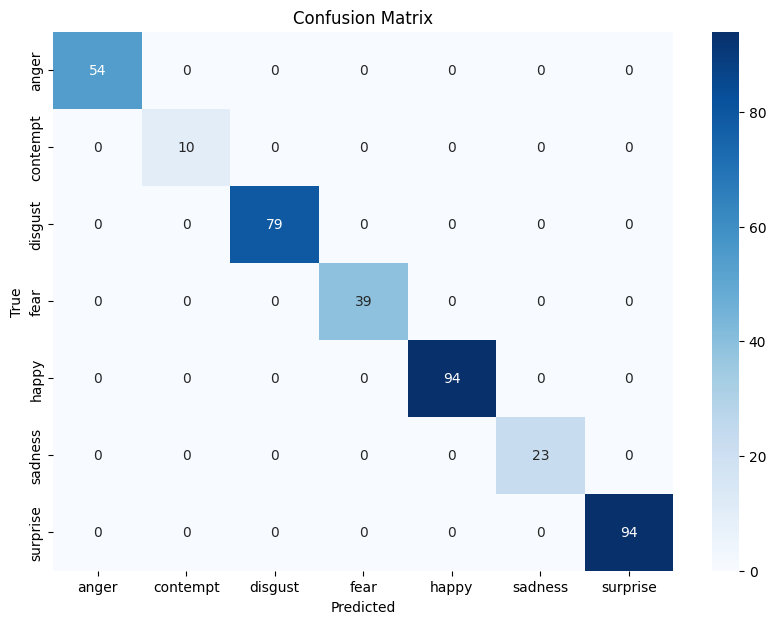

In [19]:
svm_pred = svm_model.predict(X_test)
model_evaluation(y_test, svm_pred)


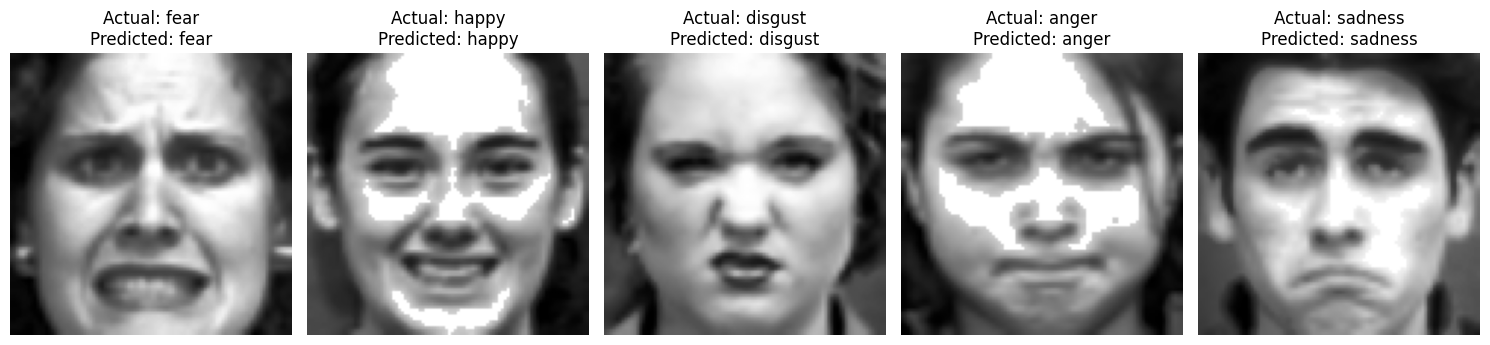

In [20]:
visualize_predictions_with_original_images(X, test_indices, y_test, svm_pred, le, num_samples=5)

In [21]:
# Cross Validation to ensure that the model is not overfitting (Since it scored 100% Accuracy)
scores = cross_val_score(svm_model, X_features, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation accuracy: {scores.mean():.2f}")

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.00


### Random Forest

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

       anger       1.00      1.00      1.00        54
    contempt       1.00      1.00      1.00        10
     disgust       1.00      1.00      1.00        79
        fear       1.00      0.95      0.97        39
       happy       0.98      1.00      0.99        94
     sadness       1.00      1.00      1.00        23
    surprise       1.00      1.00      1.00        94

    accuracy                           0.99       393
   macro avg       1.00      0.99      0.99       393
weighted avg       1.00      0.99      0.99       393



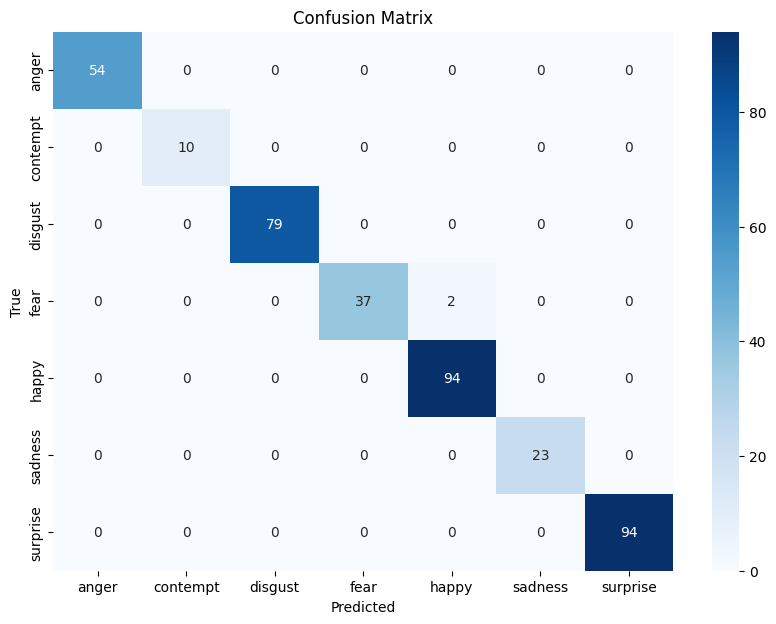

In [22]:
rf_pred = rf_model.predict(X_test)
model_evaluation(y_test, rf_pred)


In [23]:
# Cross Validation to ensure that the model is not overfitting (Since it scored 99% Accuracy)
scores = cross_val_score(rf_model, X_features, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation accuracy: {scores.mean():.2f}")

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.00


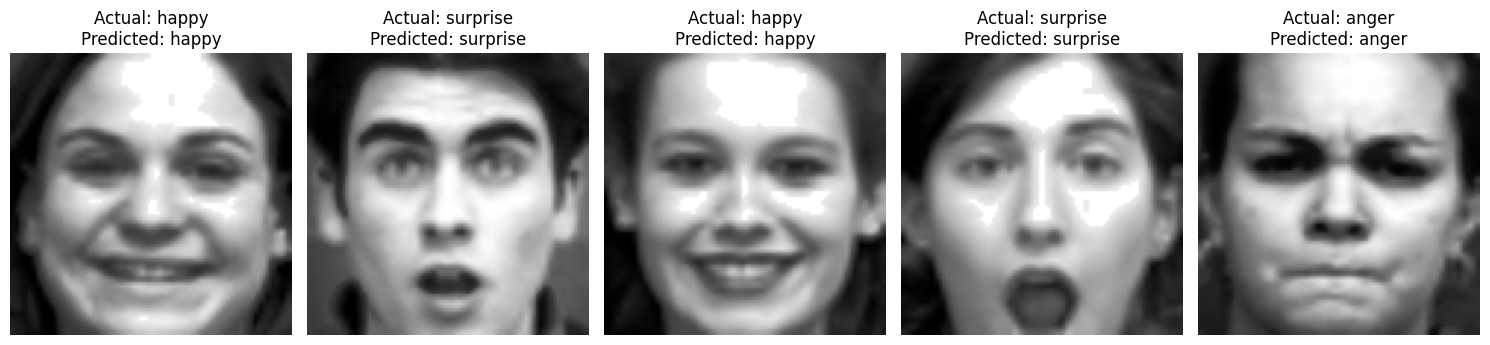

In [24]:
visualize_predictions_with_original_images(X, test_indices, y_test, svm_pred, le, num_samples=5)

### Logistic Regression

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

       anger       1.00      1.00      1.00        54
    contempt       1.00      1.00      1.00        10
     disgust       1.00      1.00      1.00        79
        fear       1.00      1.00      1.00        39
       happy       1.00      1.00      1.00        94
     sadness       1.00      1.00      1.00        23
    surprise       1.00      1.00      1.00        94

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393



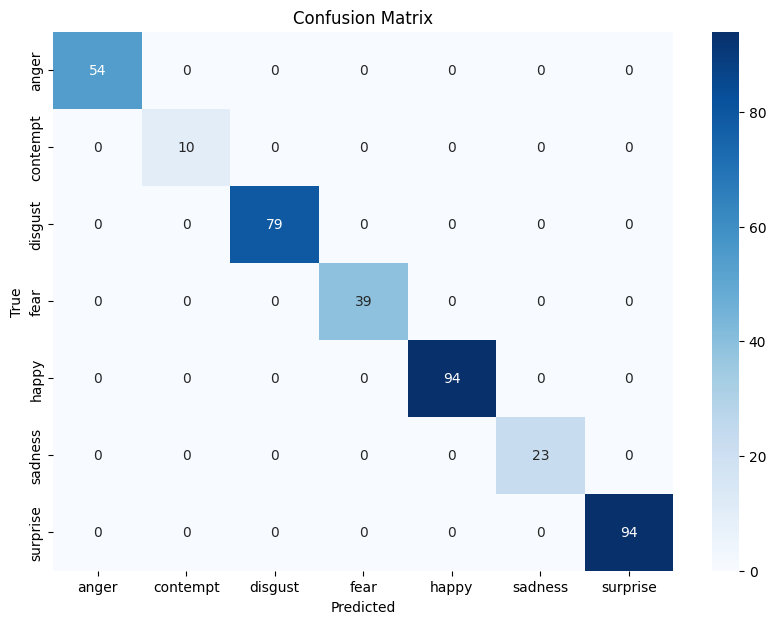

In [25]:
lf_pred = lr_model.predict(X_test)
model_evaluation(y_test, lf_pred)

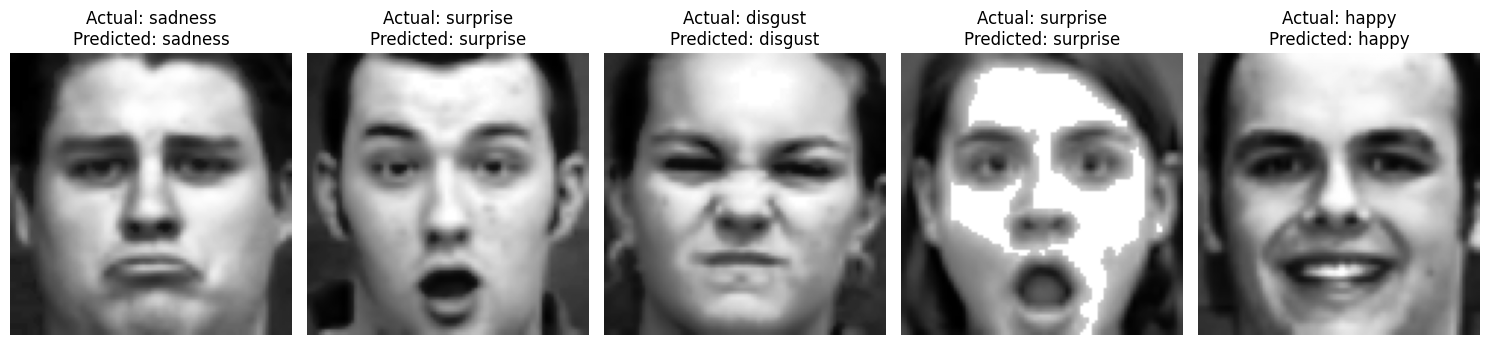

In [26]:
visualize_predictions_with_original_images(X, test_indices, y_test, svm_pred, le, num_samples=5)


In [27]:
# Cross Validation to ensure that the model is not overfitting (Since it scored 100% Accuracy)
scores = cross_val_score(lr_model, X_features, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation accuracy: {scores.mean():.2f}")

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.00


# 2) SIFT

## Feature Extraction

In [28]:
sift_features = []
sift_keypoints = []
def extract_sift_features(images):
    sift = cv2.SIFT_create()  
    for img in images:
        # Converting normalized image back to uint8 for SIFT (to 255 range)
        img_uint8 = (img * 255).astype('uint8')
        # Detecting SIFT keypoints and compute descriptors
        keypoints, descriptors = sift.detectAndCompute(img_uint8, None)
        # Appending keypoints and descriptors to the lists
        sift_keypoints.append(keypoints)
        if descriptors is not None:
            # Flatten descriptors and append to the list
            sift_features.append(descriptors.flatten())
        else:
            # If no descriptors are found, append a zero vector
            sift_features.append(np.zeros(128))

extract_sift_features(X)

In [29]:
# Combining all descriptors into a single 2D array
all_descriptors = []
for feature in sift_features:
    if feature is not None and len(feature) > 0:
        # Ensure descriptors are 2D arrays (Since they were flattened before)
        all_descriptors.append(feature.reshape(-1, 128))  
# Stack into a single 2D array
all_descriptors = np.vstack(all_descriptors) 

# KMeans clustering to create visual words
n_clusters = 350  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(all_descriptors)

# Creating a histograms for each image
X_sift_features = []
for feature in sift_features:
    if feature is not None and len(feature) > 0:
        # Reshaping descriptors to 2D for each image
        feature = feature.reshape(-1, 128)
        # Assigning each descriptor to the nearest cluster
        cluster_assignments = kmeans.predict(feature)
        # Creating a histogram of the cluster assignments
        histogram, _ = np.histogram(cluster_assignments, bins=n_clusters, range=(0, n_clusters))
        X_sift_features.append(histogram)
    else:
        # Append a zero vector(historgram) if there are no discriptors
        X_sift_features.append(np.zeros(n_clusters))

X_sift_features = np.array(X_sift_features)
print(f"SIFT features shape (BoW): {X_sift_features.shape}")

SIFT features shape (BoW): (1962, 350)


### Feature Map Examples (Keypoint Visualization)

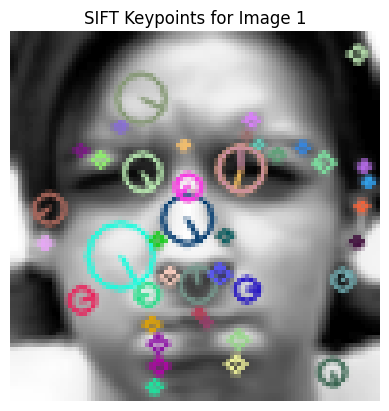

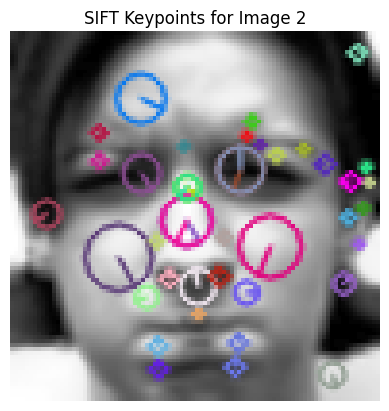

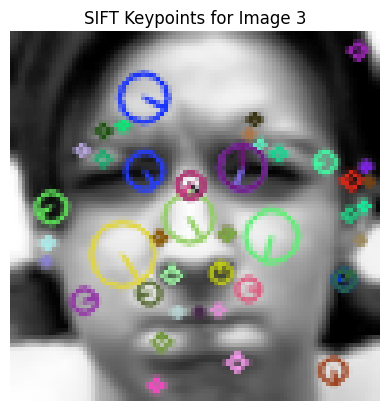

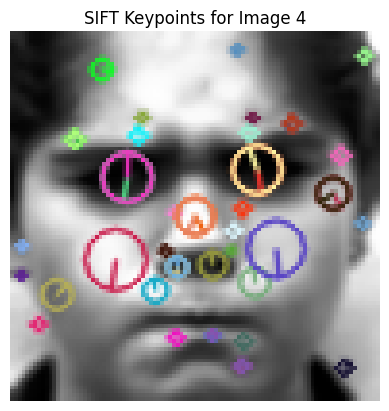

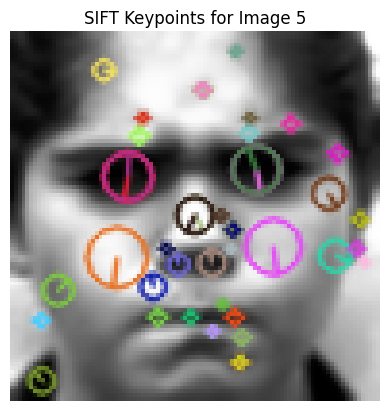

In [30]:
def visualize_sift_keypoints(images, keypoints, num_images=5):
    for i in range(num_images):
        # Converting the normalized image back to uint8 for visualization
        img_uint8 = (images[i] * 255).astype('uint8')
        # Draw keypoints on the image
        keypoint_img = cv2.drawKeypoints(
            img_uint8,
            keypoints[i],
            None,
            flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
        )
        plt.imshow(keypoint_img, cmap='gray')
        plt.title(f"SIFT Keypoints for Image {i + 1}")
        plt.axis('off')
        plt.show()

# Visualize SIFT keypoints for the first 5 images
visualize_sift_keypoints(X, sift_keypoints)

## Train - Test Split

In [31]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X_sift_features, y_encoded, np.arange(len(X)), test_size=0.2, random_state=42
)
# X_train, X_test, y_train, y_test = train_test_split(X_sift_features, y_encoded, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1569, 350)
Testing set size: (393, 350)


## Model Training

### SVM

In [32]:
# Initialize the SVM classifier
svm_model_SIFT = SVC(kernel='linear', class_weight= 'balanced', random_state=42)

# Train the model on the training set
svm_model_SIFT.fit(X_train, y_train)

print("SVM model training complete.")

SVM model training complete.


### Random Foreset

In [33]:
rf_model_SIFT = RandomForestClassifier(n_estimators=100, class_weight= 'balanced', random_state=42)
rf_model_SIFT.fit(X_train, y_train)
print("Random Forest model training complete.")

Random Forest model training complete.


### Logistic Regression

In [34]:
lr_model_SIFT = LogisticRegression(max_iter=1000, class_weight= 'balanced', random_state=42)
lr_model_SIFT.fit(X_train, y_train)
print("Logistic Regression model training complete.")

Logistic Regression model training complete.


## Model Evaluation

### SVM

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

       anger       1.00      1.00      1.00        54
    contempt       1.00      1.00      1.00        10
     disgust       1.00      1.00      1.00        79
        fear       1.00      1.00      1.00        39
       happy       1.00      1.00      1.00        94
     sadness       1.00      1.00      1.00        23
    surprise       1.00      1.00      1.00        94

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393



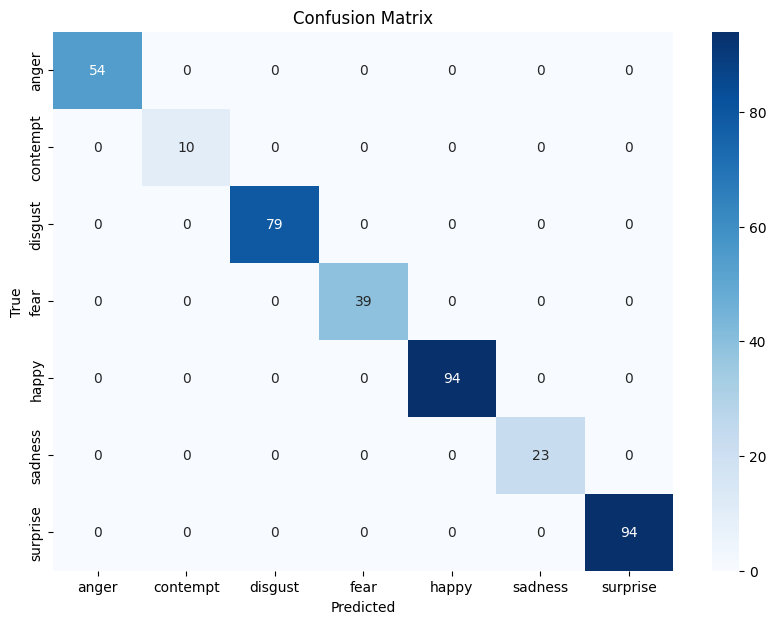

In [35]:
svm_model_SIFT_pred = svm_model_SIFT.predict(X_test)
model_evaluation(y_test, svm_model_SIFT_pred)

In [36]:
# Cross Validation to ensure that the model is not overfitting (Since it scored 100% Accuracy)
scores = cross_val_score(svm_model_SIFT, X_features, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation accuracy: {scores.mean():.2f}")

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.00


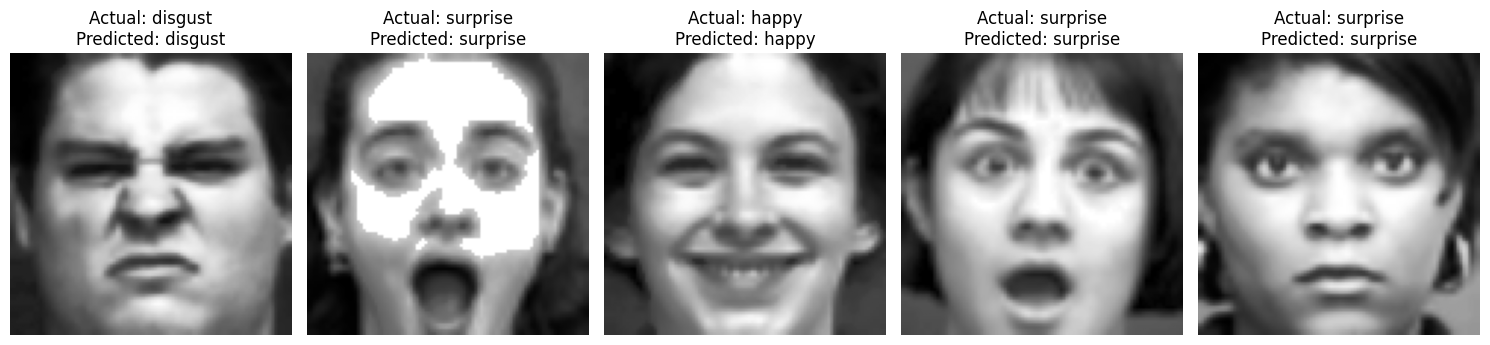

In [37]:
visualize_predictions_with_original_images(X, test_indices, y_test, svm_pred, le, num_samples=5)

### Random Forest

Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

       anger       1.00      0.96      0.98        54
    contempt       1.00      1.00      1.00        10
     disgust       1.00      1.00      1.00        79
        fear       1.00      0.85      0.92        39
       happy       0.94      1.00      0.97        94
     sadness       1.00      1.00      1.00        23
    surprise       0.98      1.00      0.99        94

    accuracy                           0.98       393
   macro avg       0.99      0.97      0.98       393
weighted avg       0.98      0.98      0.98       393



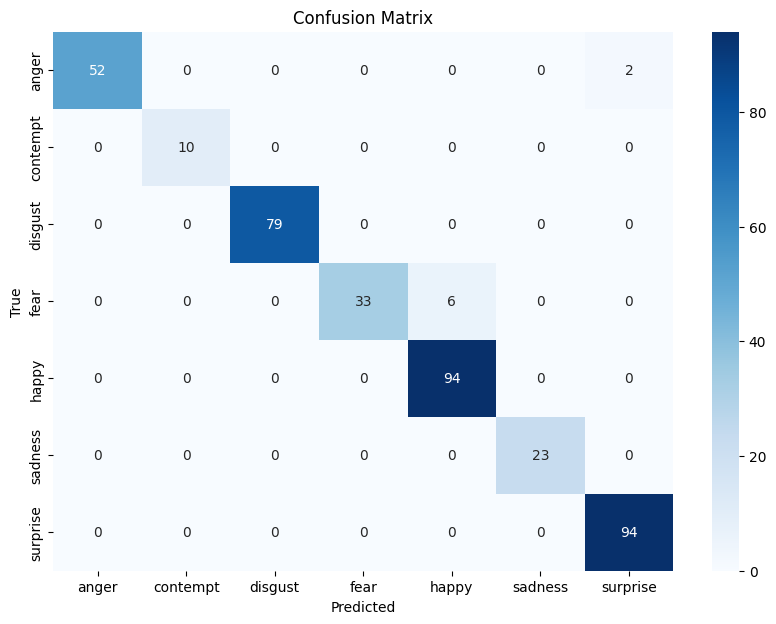

In [38]:
rf_model_SIFT_pred = rf_model_SIFT.predict(X_test)
model_evaluation(y_test, rf_model_SIFT_pred)

In [39]:
# Cross Validation to ensure that the model is not overfitting (Since it scored 98% Accuracy)
scores = cross_val_score(rf_model_SIFT, X_features, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation accuracy: {scores.mean():.2f}")

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.00


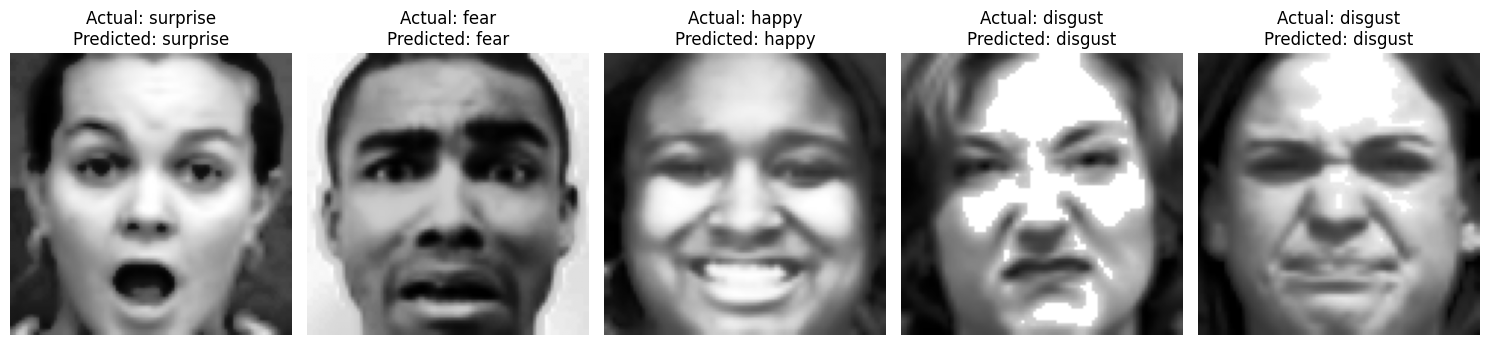

In [40]:
visualize_predictions_with_original_images(X, test_indices, y_test, svm_pred, le, num_samples=5)

### Logistic Regression

Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

       anger       0.96      0.96      0.96        54
    contempt       1.00      1.00      1.00        10
     disgust       1.00      1.00      1.00        79
        fear       1.00      0.85      0.92        39
       happy       0.96      1.00      0.98        94
     sadness       0.92      1.00      0.96        23
    surprise       1.00      1.00      1.00        94

    accuracy                           0.98       393
   macro avg       0.98      0.97      0.97       393
weighted avg       0.98      0.98      0.98       393



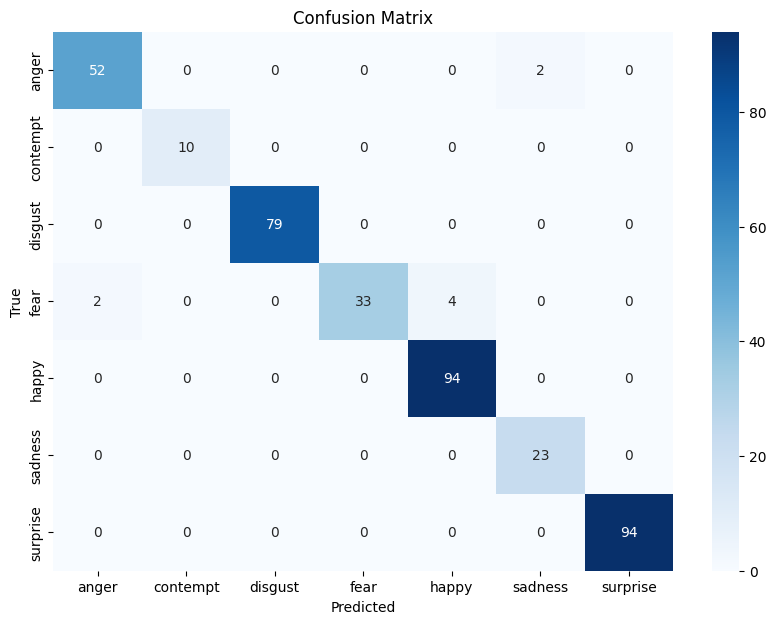

In [41]:
lr_model_SIFT_pred = lr_model_SIFT.predict(X_test)
model_evaluation(y_test, lr_model_SIFT_pred)

In [42]:
# Cross Validation to ensure that the model is not overfitting (Since it scored 98% Accuracy)
scores = cross_val_score(lr_model_SIFT, X_features, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation accuracy: {scores.mean():.2f}")

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.00


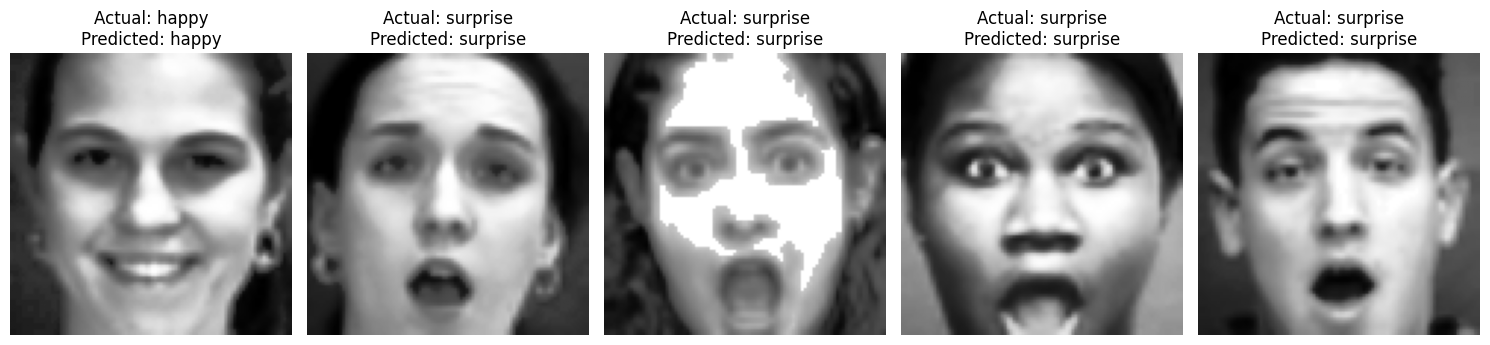

In [43]:
visualize_predictions_with_original_images(X, test_indices, y_test, svm_pred, le, num_samples=5)

# Predicting Emotions in Real - Time (Using Webcam)

In [44]:
joblib.dump(svm_model, 'emotion_classifier.pkl')
print("Model saved as 'emotion_classifier.pkl'.")

# Load the LabelEncoder
joblib.dump(le, 'label_encoder.pkl')
print("LabelEncoder saved as 'label_encoder.pkl'.")

Model saved as 'emotion_classifier.pkl'.
LabelEncoder saved as 'label_encoder.pkl'.


In [45]:
# Load the trained SVM model
svm_model = joblib.load('emotion_classifier.pkl')
print("Model loaded successfully.")

joblib.dump(le, 'label_encoder.pkl')
print("LabelEncoder saved as 'label_encoder.pkl'.")

Model loaded successfully.
LabelEncoder saved as 'label_encoder.pkl'.


In [47]:
# Use Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start video capture (0 for default webcam)
cap = cv2.VideoCapture(0)  

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the face region
        face = gray[y:y+h, x:x+w]

        # Apply the same preprocessing pipeline as during training (resize, equalize, normalize)
        resized = cv2.resize(face, (96, 96))
        equalized = cv2.equalizeHist(resized)
        normalized = equalized / 255.0

        # Extract HOG features
        hog_features = hog(normalized, orientations=9, pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)

        # Predict the emotion
        emotion_label_num = svm_model.predict([hog_features])[0]
        emotion_label_text = le.inverse_transform([emotion_label_num])[0]

        # Display the emotion label (in text) on the video frame
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion_label_text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the frame
    cv2.imshow('Emotion Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()